# Huffman Compression Algorithm

### What is the difference between lossless and lossy compression?

#### Lossless compression
Lossless compression is a method that reduces the size of the data without sacrificing any information.
This means that when the file/data is uncompressed, the original is fully restored. 

#### Lossy compression
A method that reduces the size of the data by sacrificing some of the information. This means that when a data is uncompressed, some of the original information may be lost or degraded. 

Lossy compression achieves compression by removing data that is deemed less important or perceptually irrelevant. For example, in an image, lossy compression might reduce the number of colors or remove fine details that are not noticeable to the human eye.

### When can we get away with lossy compression?

Lossy compression can be used in situations where some loss of data or quality is acceptable or imperceptible to the human senses. For example when we compress Images, Audio or Vidoes

### What is entropy?
In information theory, entropy is a measure of the amount of uncertainty or randomness in a set of data or information. The more random or unpredictable the data is, the higher its entropy will be. This concept is used in data compression, where high-entropy data can be compressed more effectively than low-entropy data.

### How are Huffman trees constructed?
The codes are constructed in a way that minimizes the average code length for the symbols that appear most frequently in the message.
The steps to construct a Huffman tree are as follows:
1. Determine the frequency of each symbol in the message.
1. Sort the symbols in order of increasing frequency.
1. Combine the two symbols with the lowest frequencies into a single node, assigning the sum of their frequencies as the frequency of the new node.
1. Add the new node to the list of symbols, and remove the two original symbols from the list.
1. Repeat steps 3 and 4 until there is only one node left in the list. This node represents the root of the Huffman tree.
1. Traverse the tree to assign a binary code to each symbol. Starting from the root node, assign a '0' for every left branch and a '1' for every right branch until reaching the leaf node for each symbol.

#### Example: 
Suppose we have a message consisting of the symbols "A", "B", "C", "D", and "E" with the following frequencies:
1. A:5
1. B:2
1. C:1
1. D:4
1. E:3

We start by combining "C" and "B" to create a new node with a frequency of 3. Then we combine "E" and the new node to create a new node with a frequency of 6. Next, we combine "D" and "A" to create a new node with a frequency of 9. Finally, we combine the two remaining nodes to create the root of the Huffman tree:
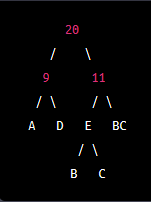

We can then traverse the tree to assign binary codes to each symbol:
1. A: 0
1. B: 110
1. C: 111
1. D: 10
1. E: 01

### How can we get back the uncompressed data from the Huffman tree?

We need to traverse the tree using the encoded bitstream and decode each symbol. This is done by starting at the root of the tree and following the path down the tree based on the encoded bits. At each node, we check if we have reached a leaf node. If so, we have found a symbol and can output it. Otherwise, we continue to follow the path down the tree until we reach a leaf node.

### Implement the algorithm.

In [1]:
class Node():
    def __init__(self, freq, char=None,  left=None, right=None):
        self.left = left
        self.right = right
        self.char = char
        self.freq = freq

    def children(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)

def create_node(t):
    return Node(t[1], t[0])

def create_huffman_tree(nodes):
    while len(nodes) >= 1:
        left_node = nodes.pop(0)
        if (len(nodes) == 0):
            return left_node
        right_node = nodes.pop(0)
        nodes.append(Node(left_node.freq + right_node.freq,
                     left=left_node, right=right_node))
        nodes = sorted(nodes, key=lambda item: item.freq)

def huffman_code_tree(node, left=True, binString=''):
    if node.char is not None:
        return {node.char: (node.freq, binString)}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d

def calc_tree_size(dict):
    values = dict.values()
    result = 0
    for v in values:
        result += v[0]*len(v[1])
        result += v[0]
    result += len(values)*8
    return result

text = 'BCAADDDCCACACAC'
freq = {}

for c in text:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1

freq = sorted(freq.items(), key=lambda item: item[1])
nodes = list(map(create_node, freq))
huffman_tree = create_huffman_tree(nodes)

encoded_values = huffman_code_tree(huffman_tree)
totalSize = 0
initial_size = len(text) * 8
tree_size = calc_tree_size(encoded_values)

print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, encoded_values[char]))

print(f"Intial Size -> {initial_size}")
print(f"Tree Size -> {tree_size}")

 Char | Huffman code 
----------------------
 'B'  |  (1, '100')
 'D'  |  (3, '101')
 'A'  |   (5, '11')
 'C'  |    (6, '0')
Intial Size -> 120
Tree Size -> 75


#### Percentage compression

In [2]:
print((tree_size/initial_size) * 100)

62.5


Huffman's algorithm is a lossless compression algorithm that works by encoding the most frequently occurring symbols with shorter bit strings and less frequent symbols with longer bit strings. It performs well for compressing data with a high degree of redundancy, such as text files, where certain characters or character combinations appear more frequently than others. Huffman's algorithm can achieve compression ratios of up to 50% for such data.

LZ77, on the other hand, is a lossless compression algorithm that works by replacing repeated occurrences of data with references to a single copy of that data existing earlier in the uncompressed data stream. It performs well for compressing data with long repeated sequences, such as images, audio, and video files. LZ77 can achieve higher compression ratios than Huffman's algorithm for such data.

In general, the performance of a compression algorithm depends on the type of data being compressed. Huffman's algorithm is generally more suitable for text files, while LZ77 is more suitable for multimedia files. However, there are many other compression algorithms available that are optimized for different types of data and can achieve even higher compression ratios than Huffman's algorithm or LZ77 for specific types of data.